In [22]:
import numpy as np
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from spec_id import Galaxy_ids
import pandas as pd
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [23]:
gids=Galaxy_ids('masslist_mar22.dat')

In [5]:
goods_s=Table.read('/Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii')
goods_n=Table.read('/Users/Vince.ec/Clear_data/goodsn_mosaic/goodsn_3dhstP.cat',format='ascii')
# 
# goods_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Catalog/goodss_3dhst.v4.1.cat',format='ascii')
# goods_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Catalog/goodsn_3dhst.v4.1.cat',format='ascii')
# 
restc_s=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii')
restc_n=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii')
# 
# restc_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii')
# restc_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii')

In [7]:
# fast_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',format='ascii')
# fast_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',format='ascii')

fast_s=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',format='ascii')
fast_n=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',format='ascii')

In [9]:
IDS=[]
IDN=[]

for i in range(len(restc_s['id'])):
    if 1 <= restc_s['z'][i] <= 1.75 and goods_s['class_star'][i]<0.8 and fast_s['lmass'][i] >= 10:
        IDS.append(i)


for i in range(len(restc_n['id'])):
    if 1 <= restc_n['z'][i] <= 1.75 and goods_n['class_star'][i]<0.8 and fast_n['lmass'][i] >= 10:
        IDN.append(i)

In [11]:
def Mag(band):
    magnitude=25-2.5*np.log10(band)
    return magnitude

uvS=Mag(restc_s['L153'][IDS]) - Mag(restc_s['L155'][IDS])
vjS=Mag(restc_s['L155'][IDS]) - Mag(restc_s['L161'][IDS])
uvN=Mag(restc_n['L153'][IDN]) - Mag(restc_n['L155'][IDN])
vjN=Mag(restc_n['L155'][IDN]) - Mag(restc_n['L161'][IDN])


IDSQ=[]
IDSsf=[]

IDNQ=[]
IDNsf=[]

for i in range(len(uvS)):
    if uvS[i]>=0.88*vjS[i]+0.59 and uvS[i]>1.382 and vjS[i]<1.65:
        IDSQ.append(i)
    if uvS[i]<0.88*vjS[i]+0.59:
        IDSsf.append(i)
        
for i in range(len(uvN)):
    if uvN[i]>=0.88*vjN[i]+0.59 and uvN[i]>1.382 and vjN[i]<1.65:
        IDNQ.append(i)
    if uvN[i]<0.88*vjN[i]+0.59:
        IDNsf.append(i)

In [12]:
urest=np.zeros(len(ids))
vrest=np.zeros(len(ids))
jrest=np.zeros(len(ids))

for i in range(len(ids)):
    if ids[i][0] == 's': 
        urest[i] =  restc_s['L153'][int(ids[i][1:])-1]
        vrest[i] =  restc_s['L155'][int(ids[i][1:])-1]
        jrest[i] =  restc_s['L161'][int(ids[i][1:])-1]
    if ids[i][0] == 'n': 
        urest[i] =  restc_n['L153'][int(ids[i][1:])-1]
        vrest[i] =  restc_n['L155'][int(ids[i][1:])-1]
        jrest[i] =  restc_n['L161'][int(ids[i][1:])-1]

uvQ=Mag(urest) - Mag(vrest)
vjQ=Mag(vrest) - Mag(jrest)

In [17]:
idS=['s' + str(U) for U in goods_s['id'][IDS]]
idN=['n' + str(U) for U in goods_n['id'][IDN]]

idall = np.append(idN,idS)

In [20]:
raall = np.append(goods_n['ra'][IDN],goods_s['ra'][IDS])
decall = np.append(goods_n['dec'][IDN],goods_s['dec'][IDS])

In [35]:
uvall = np.append(uvN,uvS)
vjall = np.append(vjN,vjS)

qsflag = np.repeat('s',repeats=len(uvall))

for i in range(len(uvall)):
    if uvall[i]>=0.88*vjall[i]+0.59 and uvall[i]>1.382 and vjall[i]<1.65:
        qsflag[i] = 'q'

In [36]:
print len(qsflag)

1300


In [27]:
insamp = []

for i in range(len(idall)):
    insamp.append(idall[i] in gids.ids)

In [37]:
uvj_db = pd.DataFrame({'ra' : raall, 'dec' : decall, '(U-V)' : uvall, '(V-J)' : vjall, 'Q/S' : qsflag, 'IN_SAMP' : insamp},index=idall)

In [38]:
uvj_db.to_pickle('uvj_db.pkl')

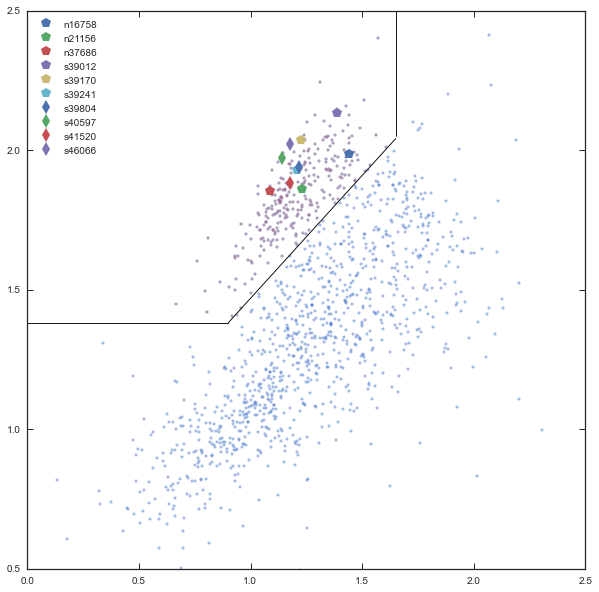

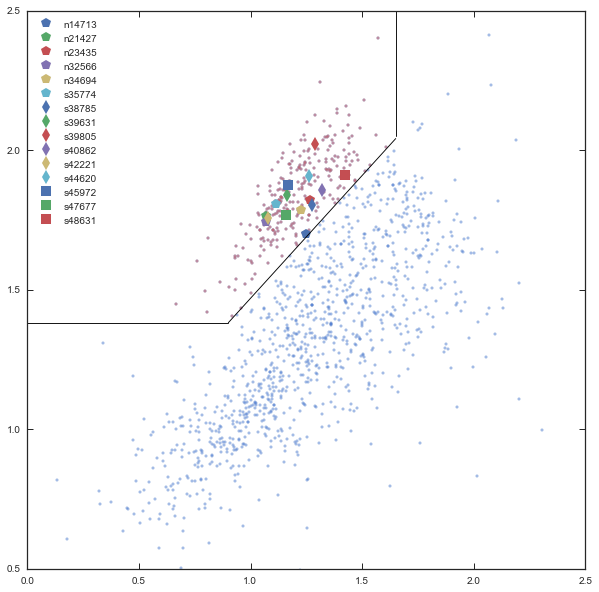

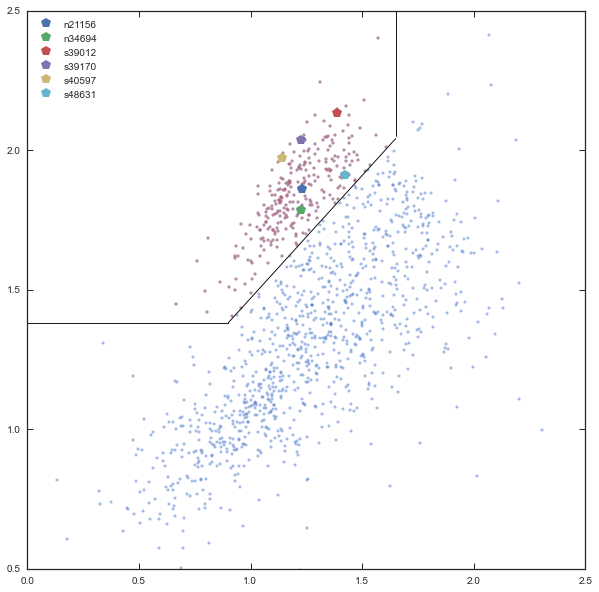

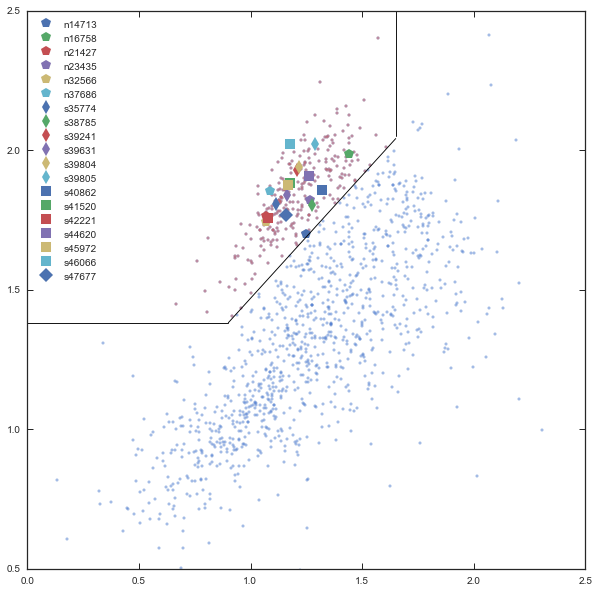

In [32]:
%matplotlib inline

points=['p','p','p','p','p','p','d','d','d','d','d','d','s','s','s','s','s','s','D']

plt.figure(figsize=[10,10])
plt.plot(vjS,uvS,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjN,uvN,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjS[IDSQ],uvS[IDSQ],'o',color=sea.color_palette('muted')[2], alpha=.3,ms=3)
plt.plot(vjN[IDNQ],uvN[IDNQ],'o',color=sea.color_palette('muted')[2], alpha=.3,ms=3)
for i in range(len(IDc)):
    plt.plot(vjQ[IDc][i],uvQ[IDc][i],points[i],ms=10,label=ids[IDc][i])
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2)
plt.show()
plt.close()

plt.figure(figsize=[10,10])
plt.plot(vjS,uvS,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjN,uvN,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjS[IDSQ],uvS[IDSQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
plt.plot(vjN[IDNQ],uvN[IDNQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
for i in range(len(IDd)):
    plt.plot(vjQ[IDd][i],uvQ[IDd][i],points[i],ms=10,label=ids[IDd][i])
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2)
plt.show()
plt.close()
# 
plt.figure(figsize=[10,10])
plt.plot(vjS,uvS,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjN,uvN,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjS[IDSQ],uvS[IDSQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
plt.plot(vjN[IDNQ],uvN[IDNQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
for i in range(len(IDmH)):
    plt.plot(vjQ[IDmH][i],uvQ[IDmH][i],points[i],ms=10,label=ids[IDmH][i])
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2)
plt.show()
plt.close()
# 
plt.figure(figsize=[10,10])
plt.plot(vjS,uvS,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjN,uvN,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjS[IDSQ],uvS[IDSQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
plt.plot(vjN[IDNQ],uvN[IDNQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
for i in range(len(IDmL)):
    plt.plot(vjQ[IDmL][i],uvQ[IDmL][i],points[i],ms=10,label=ids[IDmL][i])
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2)
plt.show()
plt.close()